In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np 
import pandas as pd
%matplotlib inline

In [31]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [32]:
X

array([[-6.38453023, -4.40384745],
       [ 2.35347351,  9.2751462 ],
       [-5.43933951, -5.51295923],
       ...,
       [ 0.98558879,  7.32549903],
       [ 3.81249769,  8.07062796],
       [ 3.85306294,  6.82137516]], shape=(1000, 2))

In [33]:
y

array([2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0,
       0, 0, 1, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0,
       0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 0,
       2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0,
       1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2,
       2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 2,
       0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2,

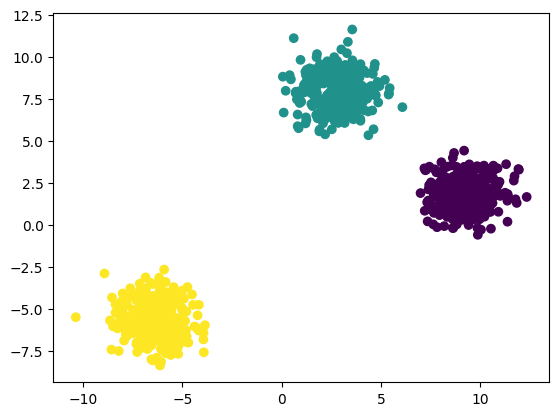

In [34]:
plt.scatter(X[:,0],X[:,1],c=y)

In [35]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [38]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [39]:
from sklearn.cluster import KMeans

In [40]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [41]:
wcss

[1339.9999999999993,
 268.3012062469667,
 37.42739496271882,
 32.210052257427705,
 27.175900206757444,
 23.69452018098176,
 23.668646525956483,
 18.892611103665274,
 17.301035175663507,
 16.342548468761674]

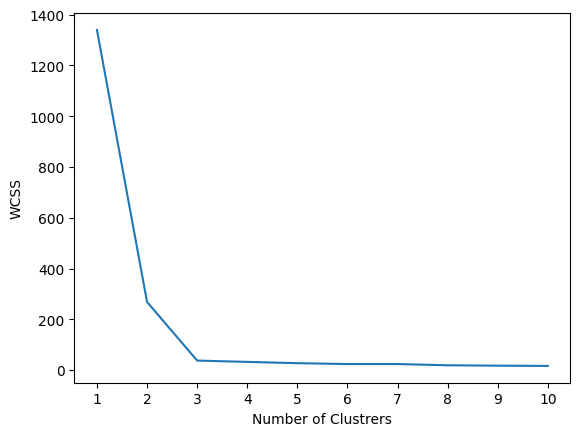

In [42]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [43]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [44]:
kmeans.fit_predict(X_train_scaled)

array([1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0,
       0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 2,
       2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2,
       1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0,
       2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0,
       2, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0,
       1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1,

In [45]:
y_pred=kmeans.predict(X_test_scaled)

In [46]:
y_pred

array([0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1,
       0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2,
       0, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2,
       1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2,
       2, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0,
       0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2,

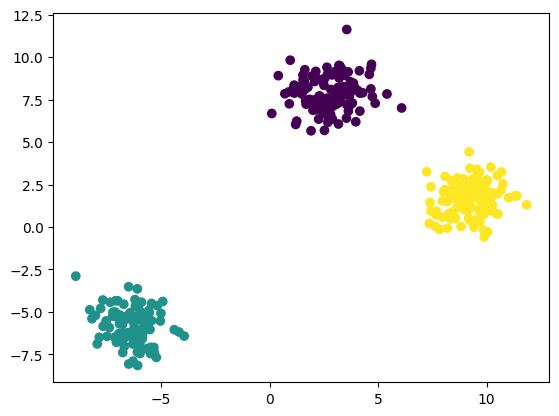

In [47]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [48]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [49]:
## kneelocator
!pip install kneed

In [50]:
from kneed import KneeLocator

In [51]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [52]:
kl.elbow

np.int64(3)

In [53]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [54]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [55]:
silhouette_coefficients

[np.float64(0.7529546468843267),
 np.float64(0.8286632284673209),
 np.float64(0.6413395250655699),
 np.float64(0.4721342799712768),
 np.float64(0.33816859217521894),
 np.float64(0.3402174636865244),
 np.float64(0.34025171913762303),
 np.float64(0.33348731776165563),
 np.float64(0.3299922913850682)]

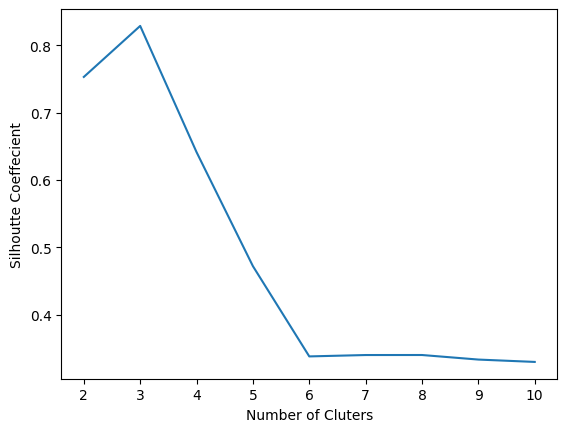

In [56]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()